Saving the Plots


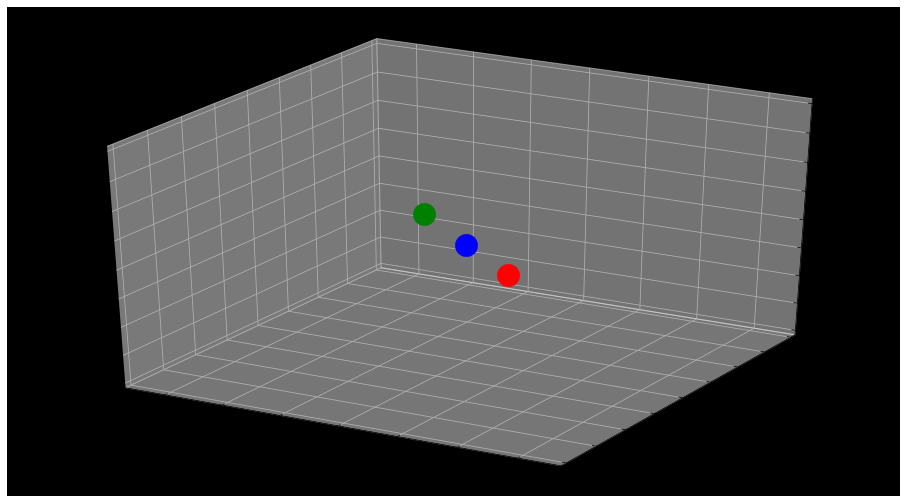

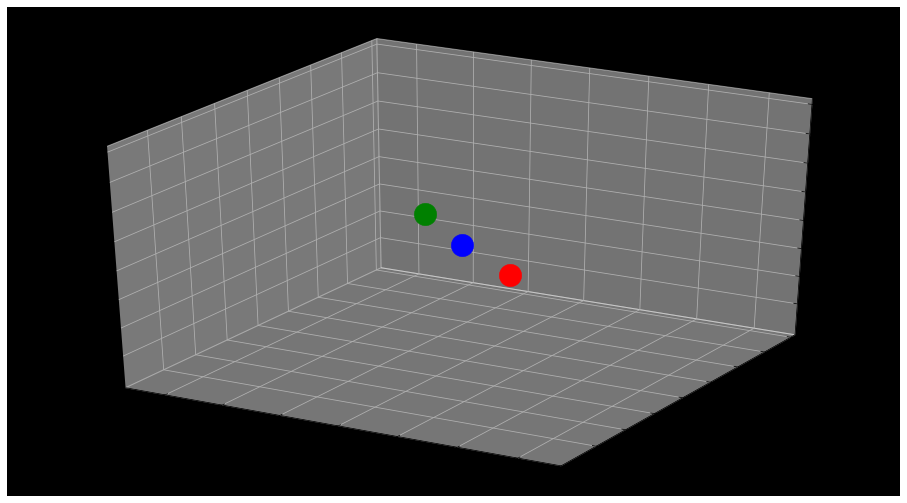

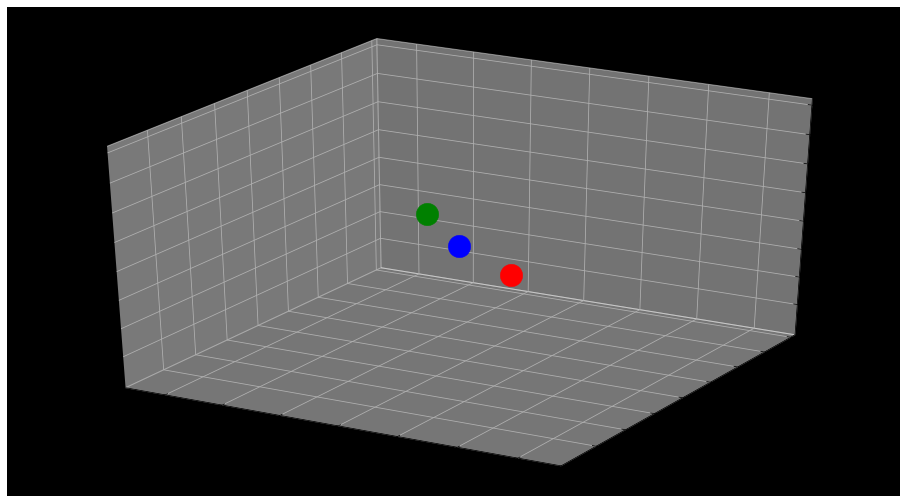

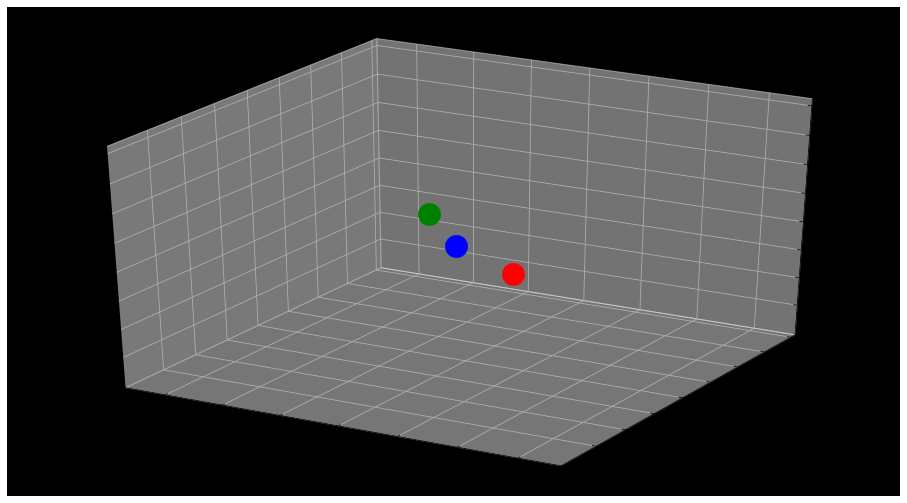

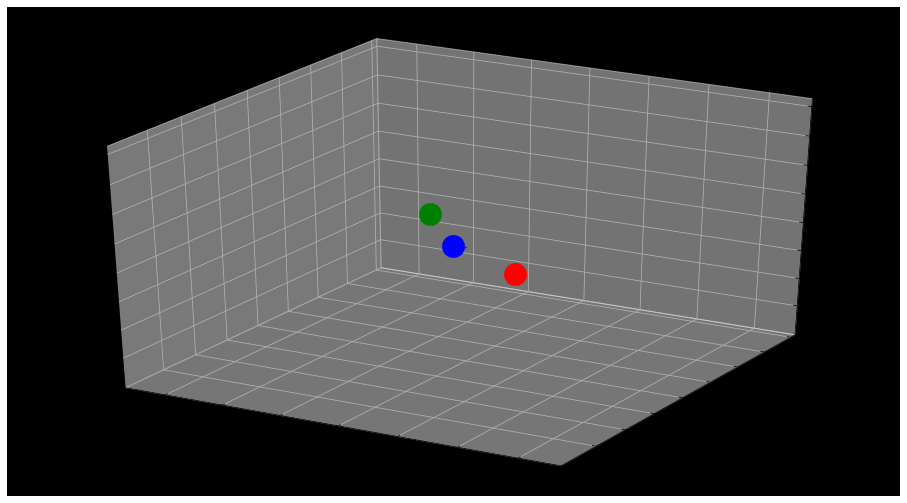

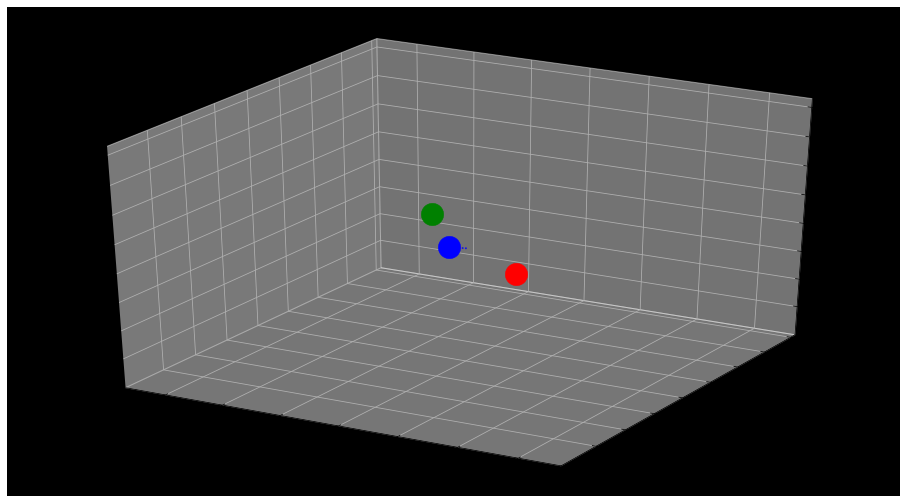

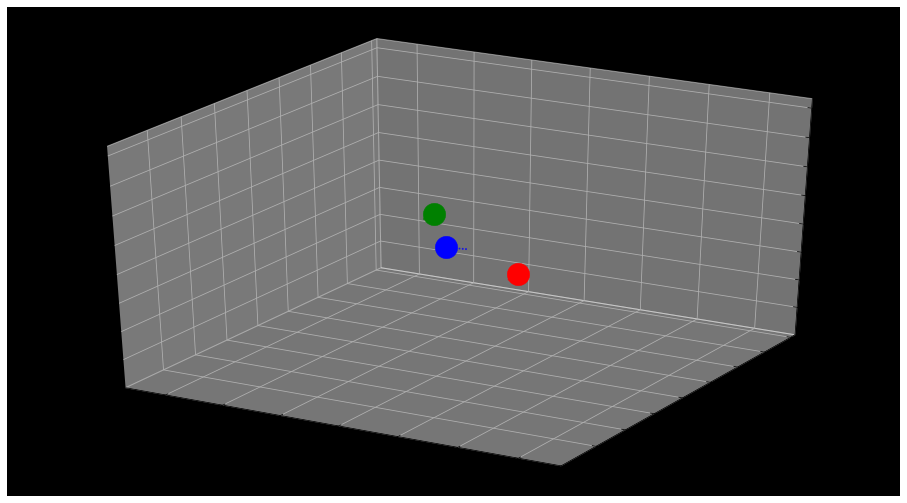

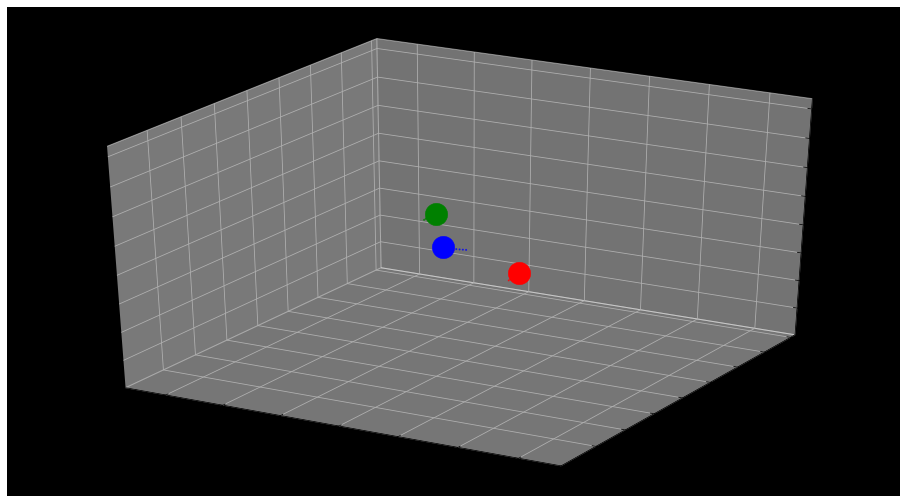

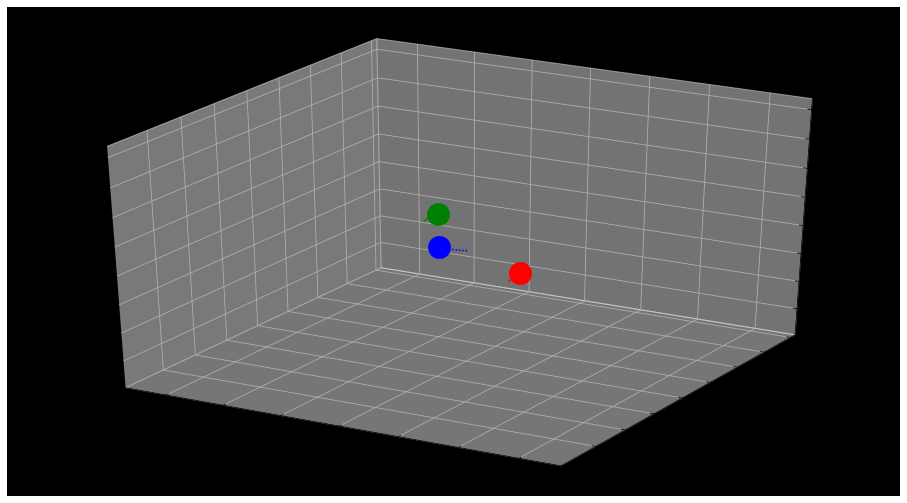

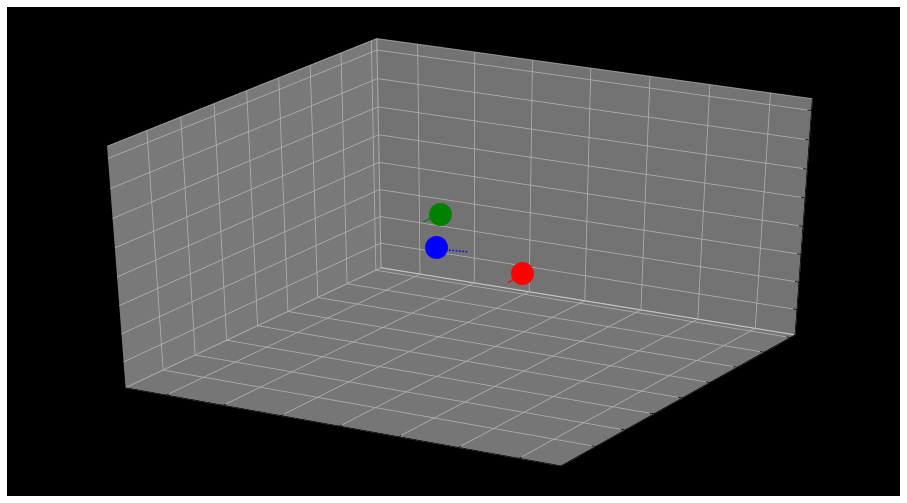

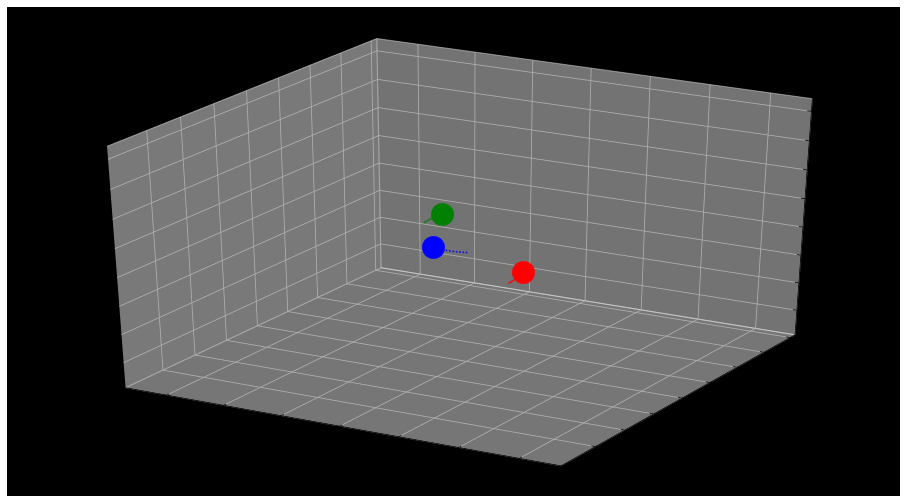

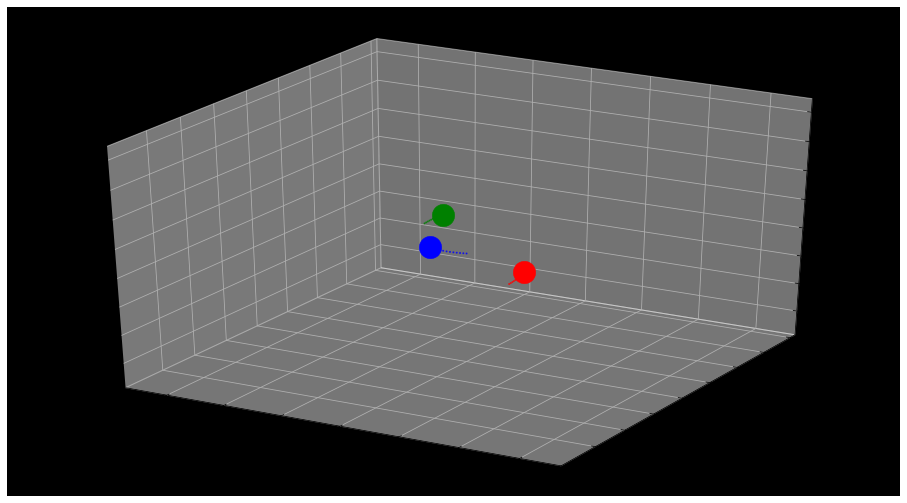

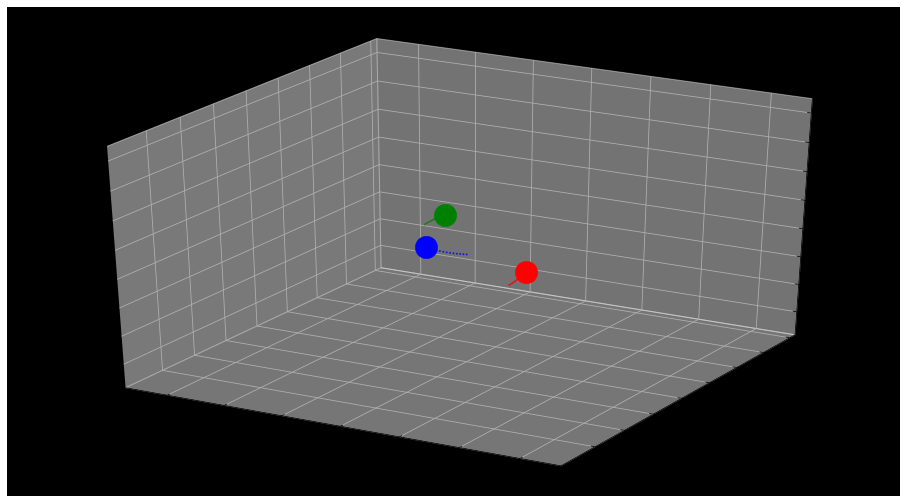

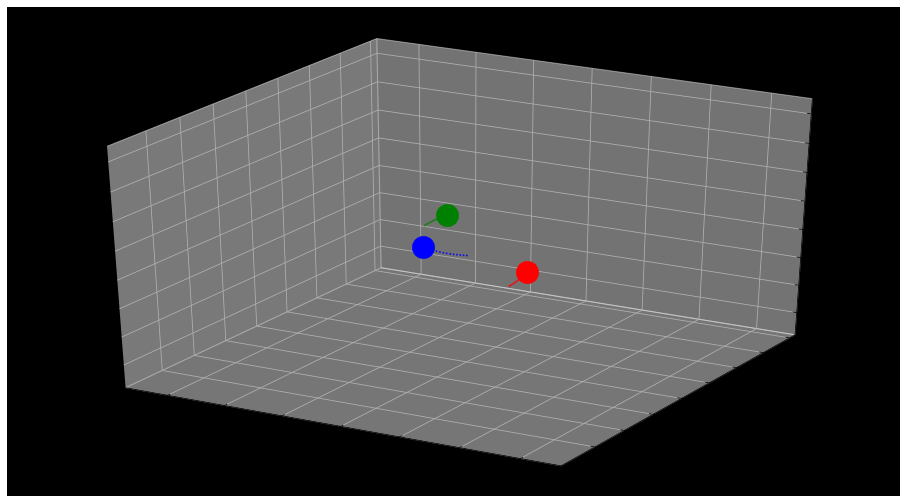

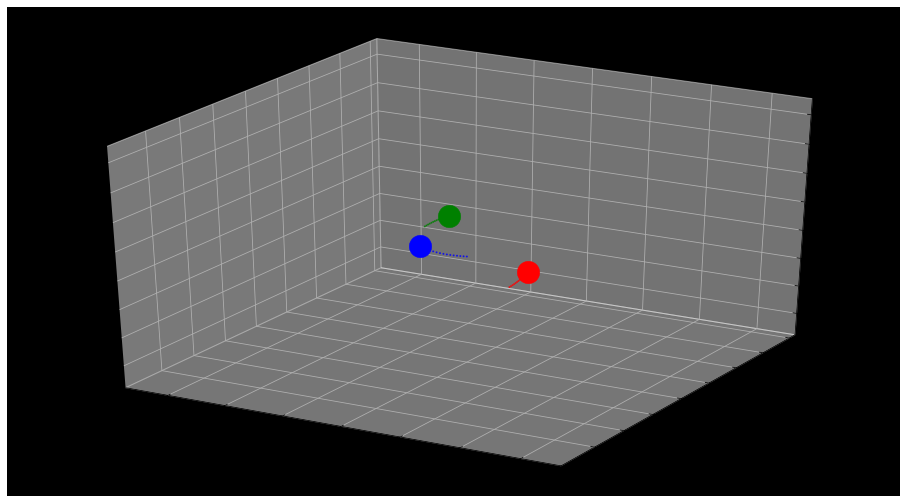

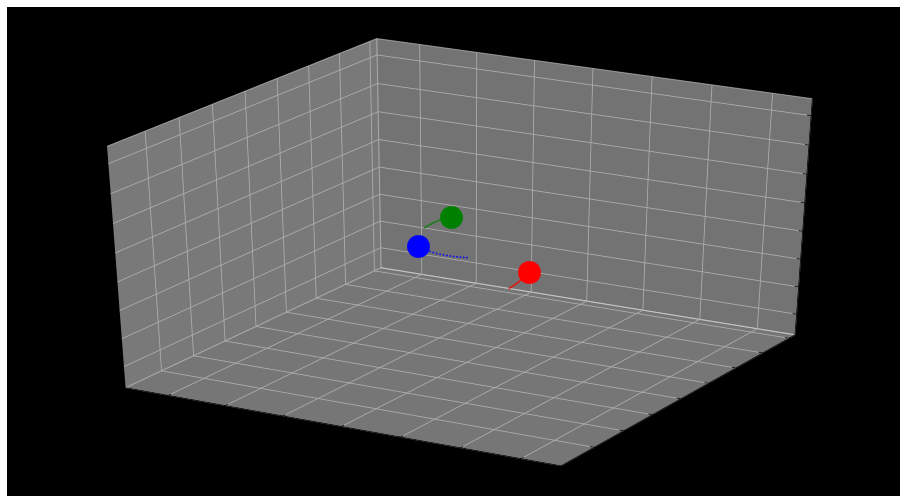

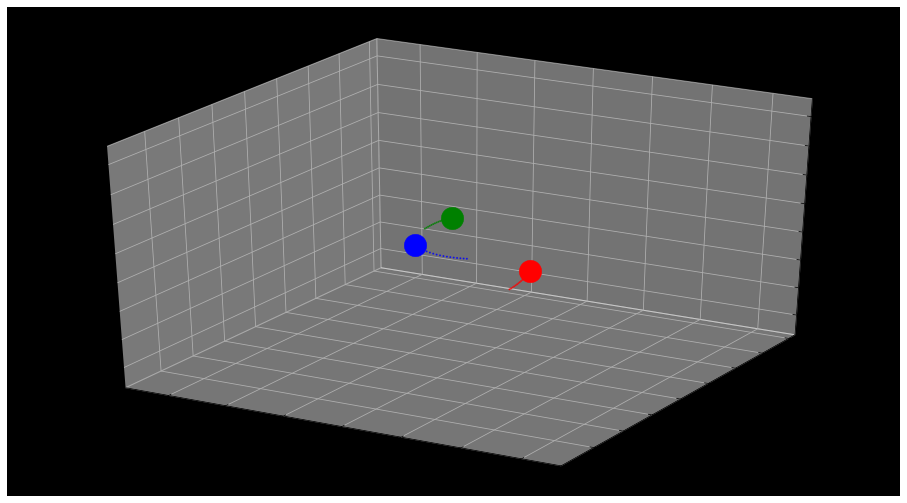

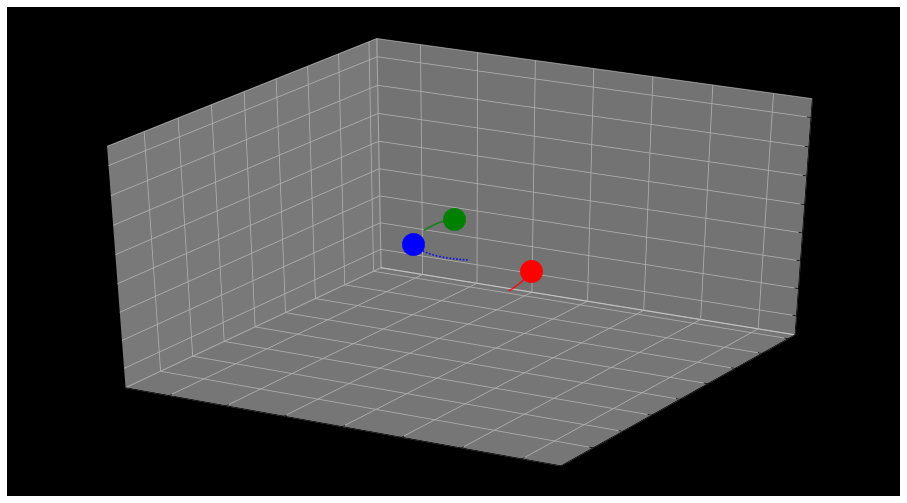

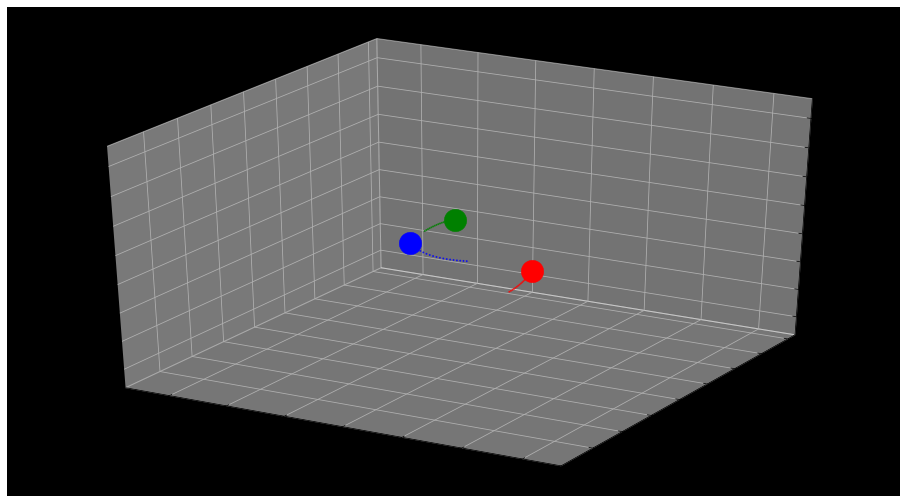

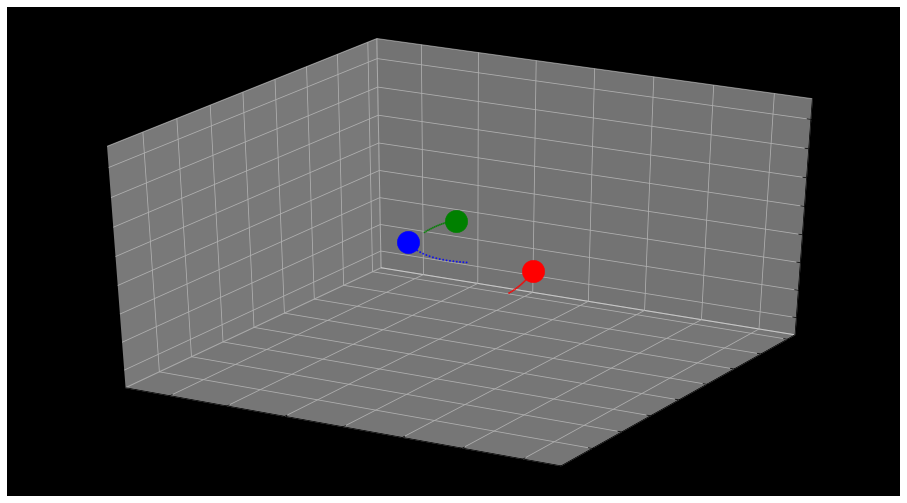

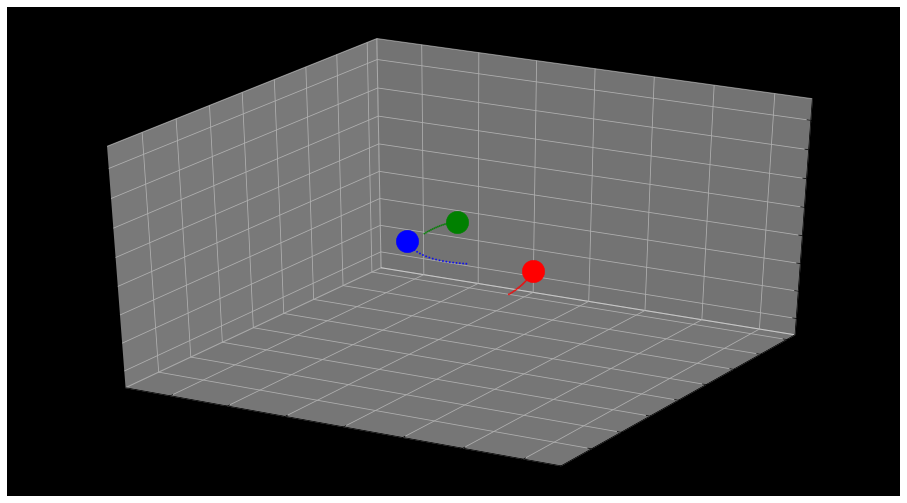

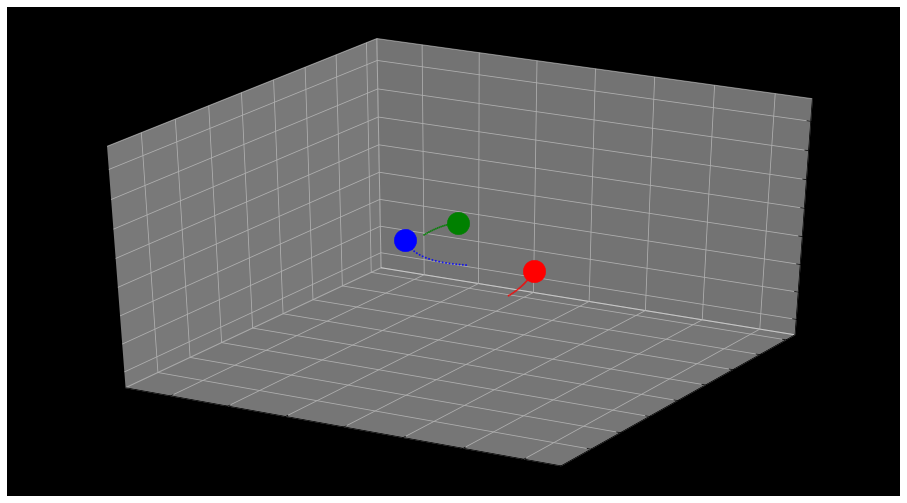

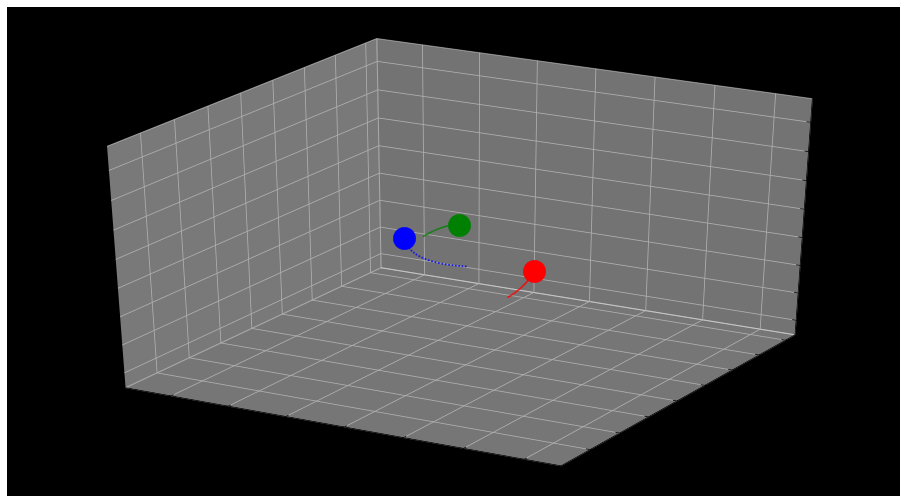

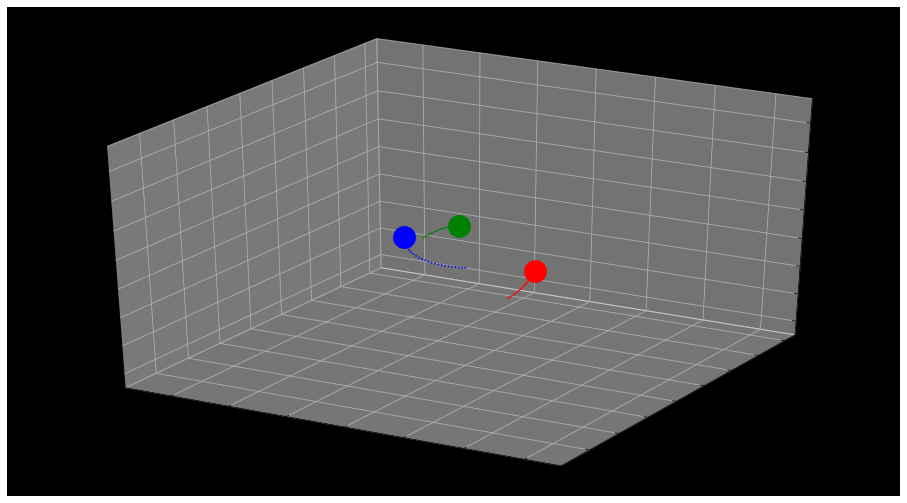

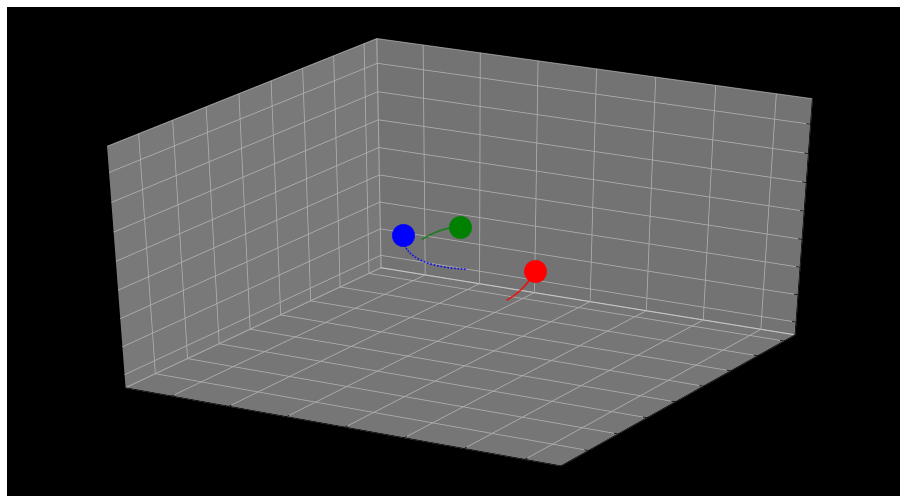

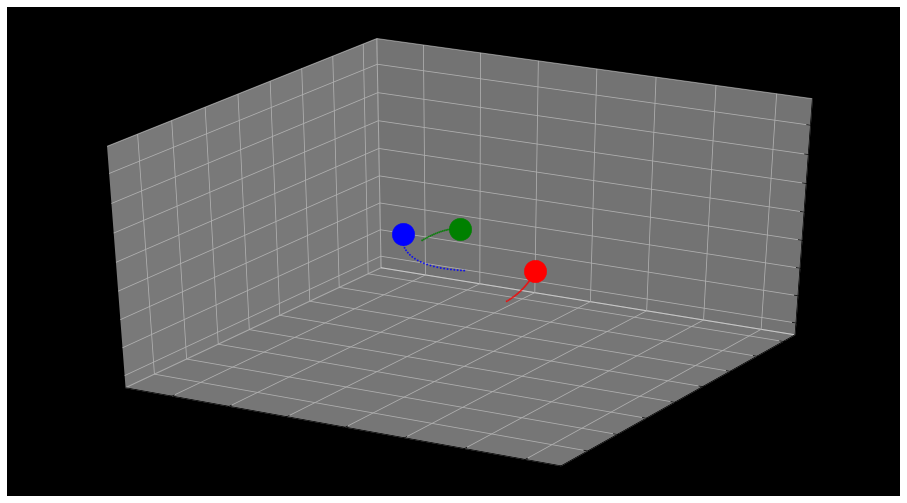

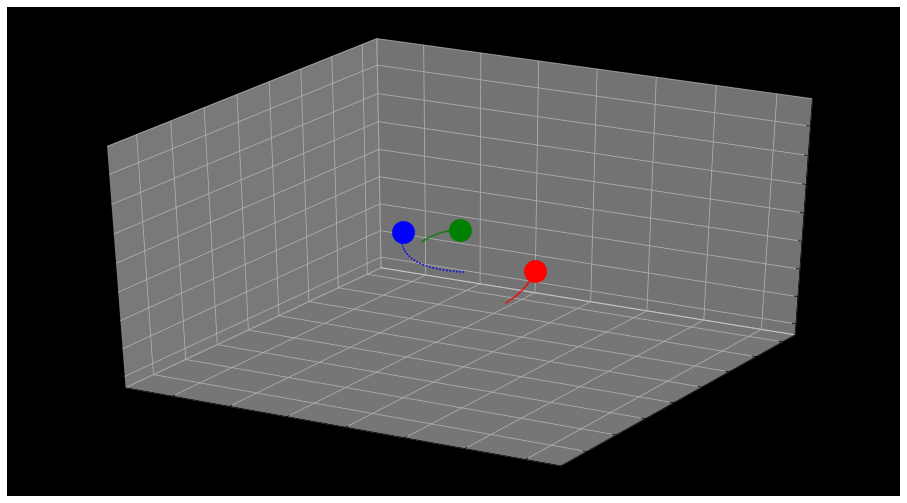

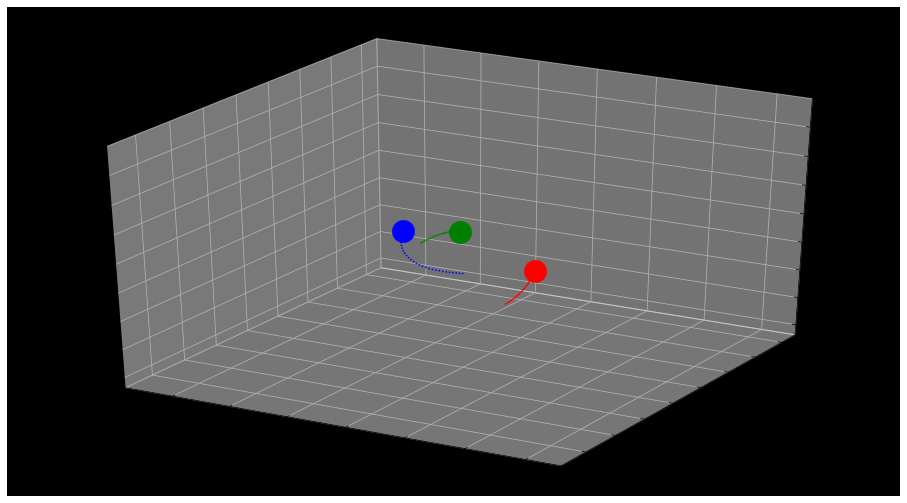

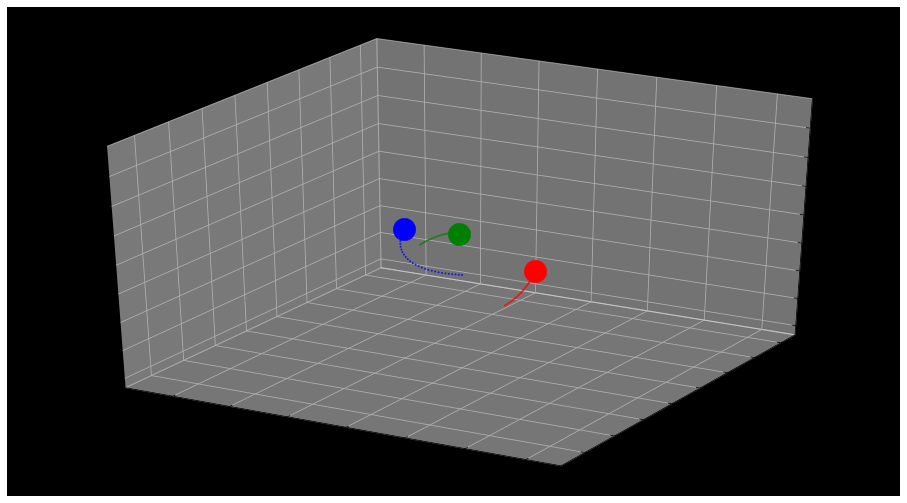

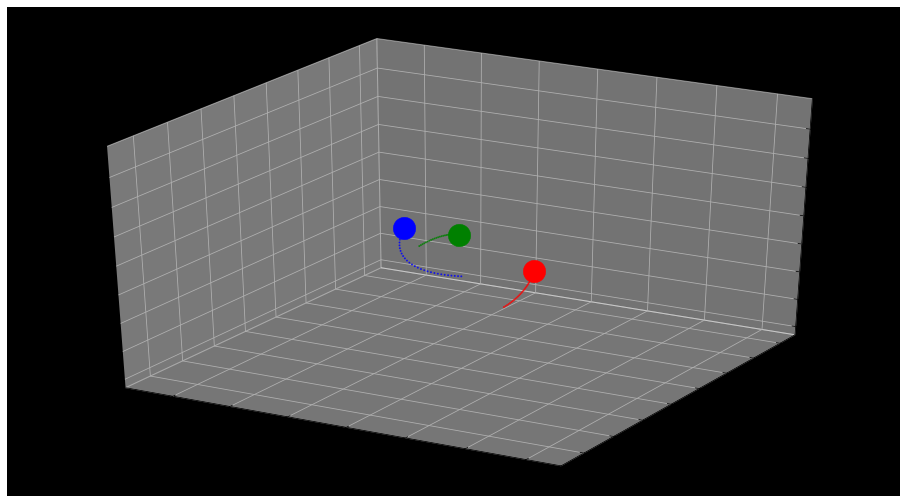

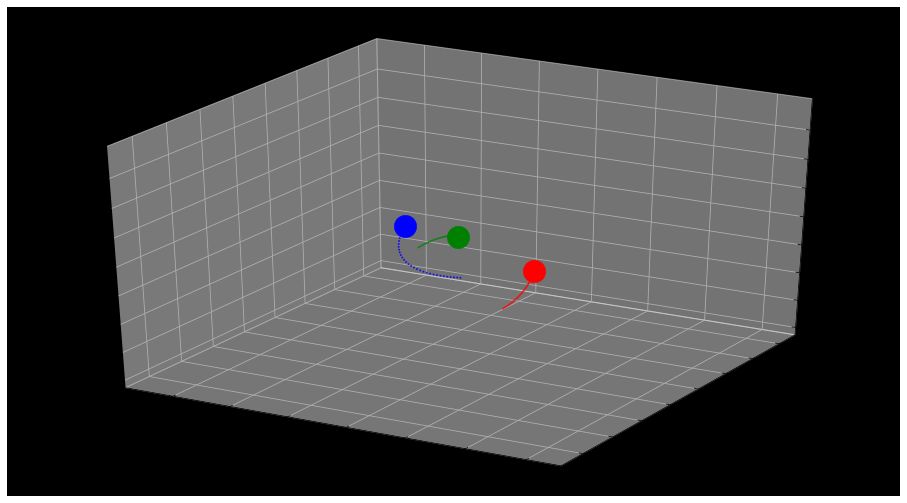

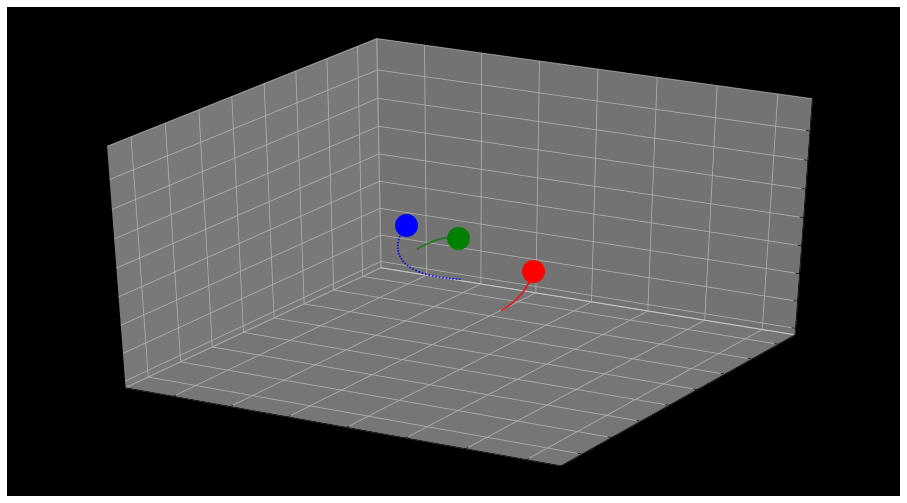

In [4]:
#### 3 Body System in 3-Dimension ####

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mass Values
m1 = 1e10
m2 = 1e10
m3 = 1e10

G = 6.674e-11
# Initial Positions and Velocities of Bodies
# First element of each array initial_xi represents the position of ith body on x-axis
# First element of each array initial_yi represents the position of ith body on y-axis
# Second element of each array initial_xi represents the velocity of ith body along x-axis
# Second element of each array initial_yi represents the velocity of ith body along y-axis

# Body 1(represented by red circle)
initial_x1 = np.array([0.97000436,0.93240737/2])
initial_y1 = np.array([-0.24308753,0.86473146/2])
initial_z1 = np.array([-0.25,0.8/2])
# Body 2(represented by green circle)
initial_x2 = np.array([-0.97000436,0.93240737/2 ])
initial_y2 = np.array([0.24308753,0.86473146/2])
initial_z2 = np.array([0.25,0.85/2])
# Body 3(represented by blue circle)
initial_x3 = np.array([0,-0.93240737])
initial_y3 = np.array([0,-0.86473146])
initial_z3 = np.array([0,0.8/2])

# Initializing bodyi 2x2matrix with the positions and velocities of ith body along x and y axis
body1 = np.array([initial_x1,initial_y1,initial_z1])
body2 = np.array([initial_x2,initial_y2,initial_z2])
body3 = np.array([initial_x3,initial_y3,initial_z3])


# acceleration_i = G*∑m_i(ri - rj)/(ri - rj)^3
# Derived from the Newton's 2nd law and the Law of Gravitation

# This function returns the velocity and acceleration of one body 'termed as the main body' 
# under the influence of the other two bodies 'termed as the pulling bodies'

def force_eq(body_main, body_pulling_1, m1, body_pulling_2, m2):
    vx = body_main[0][1]                      # All arrays here follow the same format
    vy = body_main[1][1]                      # as the one specified above in bodyi 2X2 matrices
    vz = body_main[2][1]

    xo = body_main[0][0]
    yo = body_main[1][0]
    zo = body_main[2][0]

    x1 = body_pulling_1[0][0]
    y1 = body_pulling_1[1][0]
    z1 = body_pulling_1[2][0]

    x2 = body_pulling_2[0][0]
    y2 = body_pulling_2[1][0]
    z2 = body_pulling_2[2][0]

    acceleration_x = -  G*( ( m1*( xo- x1 )/pow(pow(xo-x1,2)+pow(yo-y1,2)+pow(zo-z1,2),3/2) ) + 
                           ( m2*(xo -x2 )/pow(pow(xo -x2,2)+pow(yo-y2,2)+pow(zo-z2,2),3/2)) )
    acceleration_y = -  G*( ( m1*( yo- y1 )/pow(pow(xo-x1,2)+pow(yo-y1,2)+pow(zo-z1,2),3/2) ) + 
                           ( m2*(yo -y2 )/pow(pow(xo -x2,2)+pow(yo-y2,2)+pow(zo-z2,2),3/2)) )
    acceleration_z = -  G*( ( m1*( zo- z1 )/pow(pow(xo-x1,2)+pow(yo-y1,2)+pow(zo-z1,2),3/2) ) + 
                           ( m2*(zo -z2 )/pow(pow(xo -x2,2)+pow(yo-y2,2)+pow(zo-z2,2),3/2)) )

    return np.array([[vx,acceleration_x],[vy,acceleration_y],[vz,acceleration_z]])


# This function updates the value of the input array (positions and velocities of the main body) 
# by using the Runge Kutta Method of 4th order
# According to the RK4 method, y(n+1) = y(n) + K, where K = (k1+2*k2+2*k3+k4)/6
# P.S.: We multiplied h in the last step to make the code look cleaner
# This updated array contains the new position and velocity of the main body under the influence of the other two bodies
# This method also takes in the 
def Runge_Kutta_4(diff_eqn, body_main, body_pulling_1, m1, body_pulling_2, m2, h):

    # Defining contants k1 through k4 for RK4 method.
    # h = step size
    # m1 = mass of pulling body 1
    # m2 = mass of pulling body 2
    k1 = diff_eqn(body_main    , body_pulling_1,m1,body_pulling_2,m2)
    k2 = diff_eqn(body_main+h/2, body_pulling_1,m1,body_pulling_2,m2)
    k3 = diff_eqn(body_main+h/2, body_pulling_1,m1,body_pulling_2,m2)
    k4 = diff_eqn(body_main+h  , body_pulling_1,m1,body_pulling_2,m2)
    update = body_main + (1/6) * h * (k1+2*k2+2*k3+k4)
    return update


# This function is the main function that executes the whole procedure and 
# finds the next position of all the three bodies under the influence of each other

def Execution(body1, m1, body2, m2, body3, m3, t, h, steps):
    # The time_arr keeps track of the time elapsed
    time_arr = np.array([t])

    # making copies of initial bodyi arrays since we will be updating the original ones
    body1_arr = np.array(body1)
    body2_arr = np.array(body2)
    body3_arr = np.array(body3)

    # bodyi_x stores the position and velocity along x axis of ith body
    # bodyi_y stores the position and velocity along y axis of ith body
    body1_x = body1_arr[0]
    body1_y = body1_arr[1]
    body1_z = body1_arr[2]

    body2_x = body2_arr[0]
    body2_y = body2_arr[1]
    body2_z = body2_arr[2]

    body3_x = body3_arr[0]
    body3_y = body3_arr[1]
    body3_z = body3_arr[2]

    for i in range(steps):
        # temp1 and temp2 store the body1 and body2 arrays since these arrays are updated during the code
        temp1 = body1
        temp2 = body2
        # body1 - main body under influence of body2 and body3
        # value of body1 updated to give position and velocity at next moment
        body1 = Runge_Kutta_4(force_eq, body1, body2, m2, body3, m3, h)

        # body2 - main body under influence of body1(stored in temp1) and body3
        # value of body2 updated to give position and velocity at next moment
        body2 = Runge_Kutta_4(force_eq, body2, temp1, m1, body3, m3, h)

        # body3 - main body under influence of body1(stored in temp1) and body2(stored in temp2)
        # value of body1 updated to give position and velocity at next moment
        body3 = Runge_Kutta_4(force_eq, body3, temp1, m1, temp2, m2, h)

        # Increasing time by step size
        t+=h
        time_arr = np.append(time_arr, t)

        # Vertically stacking the initial and final position and velocity values for each body along each axis
        body1_x = np.vstack((body1_x, body1[0]))
        body1_y = np.vstack((body1_y, body1[1]))
        body1_z = np.vstack((body1_z, body1[2]))

        body2_x = np.vstack((body2_x, body2[0]))
        body2_y = np.vstack((body2_y, body2[1]))
        body2_z = np.vstack((body2_z, body2[2]))

        body3_x = np.vstack((body3_x, body3[0]))
        body3_y = np.vstack((body3_y, body3[1]))
        body3_z = np.vstack((body3_z, body3[2]))

    [b1_x, b1_vx] = body1_x.transpose()
    [b1_y, b1_vy] = body1_y.transpose()
    [b1_z, b1_vz] = body1_z.transpose()

    [b2_x, b2_vx] = body2_x.transpose()
    [b2_y, b2_vy] = body2_y.transpose()
    [b2_z, b2_vz] = body2_z.transpose()

    [b3_x, b3_vx] = body3_x.transpose()
    [b3_y, b3_vy] = body3_y.transpose()
    [b3_z, b3_vz] = body3_z.transpose()

    # returning the the final position and velocity values for each body along x and y axis
    return [[[b1_x, b1_vx], [b1_y, b1_vy], [b1_z, b1_vz]],  [[b2_x, b2_vx], [b2_y, b2_vy], [b2_z, b2_vz]],  [[b3_x, b3_vx], [b3_y, b3_vy], [b3_z, b3_vz]]]

t = 0 # starting time
h = 1/(10000) # step size for the RK4 method
steps = 10000 # number of steps of the RK4 method


[[[b1_x, b1_vx], [b1_y, b1_vy], [b1_z, b1_vz]],  [[b2_x, b2_vx], [b2_y, b2_vy], [b2_z, b2_vz]],  [[b3_x, b3_vx], [b3_y, b3_vy], [b3_z, b3_vz]]] = Execution(body1,m1,body2,m2,body3,m3,t,h,steps)

# Plotting the position of the three bodies at a point of time in a plot and saving such plots in a folder
print("Saving the Plots")
savemark = 300      # savemark represents the number of frames after which a plot is saved

# bodyi_x_trail represents the position of the trail left behind by the ith body along x axis
# bodyi_y_trail represents the position of the trail left behind by the ith body along y axis

body1_x_trail = []
body2_x_trail = []
body3_x_trail = []

body1_y_trail = []
body2_y_trail = []
body3_y_trail = []

body1_z_trail = []
body2_z_trail = []
body3_z_trail = []

frame = 2


# Plotting the different 2D plots
for j in range(int(len(b1_x)/savemark)-1):
    i = j*savemark
    fig = plt.figure(figsize=(16,9))
    avx = (b1_x[i] + b2_x[i] + b3_x[i])/3
    avy = (b1_y[i] + b2_y[i] + b3_y[i])/3
    avz = (b1_z[i] + b2_z[i] + b3_z[i])/3
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(avx-(16/9)*frame, avx+(16/9)*frame), ylim=(avy-frame,avy+frame), zlim=(avz-frame,avz+frame), projection='3d')

    ax.set_facecolor('k')
    ax.scatter(b1_x[i],b1_y[i],b1_z[i],lw=0.5,s=500,color='r')
    ax.scatter(b2_x[i],b2_y[i],b2_z[i],lw=0.5,s=500,color='g')
    ax.scatter(b3_x[i],b3_y[i],b3_z[i],lw=0.5,s=500,color='b')

    body1_x_trail.append(b1_x[i])
    body2_x_trail.append(b2_x[i])
    body3_x_trail.append(b3_x[i])

    body1_y_trail.append(b1_y[i])
    body2_y_trail.append(b2_y[i])
    body3_y_trail.append(b3_y[i])

    body1_z_trail.append(b1_z[i])
    body2_z_trail.append(b2_z[i])
    body3_z_trail.append(b3_z[i])

    ax.scatter(body1_x_trail,body1_y_trail,body1_z_trail,s=1,alpha=0.7,color='r')
    ax.scatter(body2_x_trail,body2_y_trail,body2_z_trail,s=1,alpha=0.7,color='g')
    ax.scatter(body3_x_trail,body3_y_trail,body3_z_trail,s=1,alpha=0.7,color='b')

    ax.grid(color='w',alpha=0.05)

    plt.title("Three Body Equal Mass System in 3D")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.zlabel("z axis")

    # Saving the plots with the naming format j.png, where j are natural numbers
    fig.savefig('./figure'+str(j)+'.png', dpi=300, bbox_inches='tight')
    plt.show(block=False)
    plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mass Values
m1 = 1e10
m2 = 3e10
m3 = 1e10

G = 6.674e-11
# Initial Positions and Velocities of Bodies
# First element of each array initial_xi represents the position of ith body on x-axis
# First element of each array initial_yi represents the position of ith body on y-axis
# Second element of each array initial_xi represents the velocity of ith body along x-axis
# Second element of each array initial_yi represents the velocity of ith body along y-axis

# Body 1(represented by red circle)
initial_x1 = np.array([0.97000436,0.93240737/2])
initial_y1 = np.array([-0.24308753,0.86473146/2])
initial_z1 = np.array([-0.25,0.8/2])
# Body 2(represented by green circle)
initial_x2 = np.array([-0.97000436,0.93240737/2 ])
initial_y2 = np.array([0.24308753,0.86473146/2])
initial_z2 = np.array([0.25,0.85/2])
# Body 3(represented by blue circle)
initial_x3 = np.array([0,-0.93240737])
initial_y3 = np.array([0,-0.86473146])
initial_z3 = np.array([0,0.8/2])

# Initializing bodyi 2x2matrix with the positions and velocities of ith body along x and y axis
body1 = np.array([initial_x1,initial_y1,initial_z1])
body2 = np.array([initial_x2,initial_y2,initial_z2])
body3 = np.array([initial_x3,initial_y3,initial_z3])


# acceleration_i = G*∑m_i(ri - rj)/(ri - rj)^3
# Derived from the Newton's 2nd law and the Law of Gravitation

# This function returns the velocity and acceleration of one body 'termed as the main body' 
# under the influence of the other two bodies 'termed as the pulling bodies'

def force_eq(body_main, body_pulling_1, m1, body_pulling_2, m2):
    vx = body_main[0][1]                      # All arrays here follow the same format
    vy = body_main[1][1]                      # as the one specified above in bodyi 2X2 matrices
    vz = body_main[2][1]

    xo = body_main[0][0]
    yo = body_main[1][0]
    zo = body_main[2][0]

    x1 = body_pulling_1[0][0]
    y1 = body_pulling_1[1][0]
    z1 = body_pulling_1[2][0]

    x2 = body_pulling_2[0][0]
    y2 = body_pulling_2[1][0]
    z2 = body_pulling_2[2][0]

    acceleration_x = -  G*( ( m1*( xo- x1 )/pow(pow(xo-x1,2)+pow(yo-y1,2)+pow(zo-z1,2),3/2) ) + ( m2*(xo -x2 )/pow(pow(xo -x2,2)+pow(yo-y2,2)+pow(zo-z2,2),3/2)) )
    acceleration_y = -  G*( ( m1*( yo- y1 )/pow(pow(xo-x1,2)+pow(yo-y1,2)+pow(zo-z1,2),3/2) ) + ( m2*(yo -y2 )/pow(pow(xo -x2,2)+pow(yo-y2,2)+pow(zo-z2,2),3/2)) )
    acceleration_z = -  G*( ( m1*( zo- z1 )/pow(pow(xo-x1,2)+pow(yo-y1,2)+pow(zo-z1,2),3/2) ) + ( m2*(zo -z2 )/pow(pow(xo -x2,2)+pow(yo-y2,2)+pow(zo-z2,2),3/2)) )

    return np.array([[vx,acceleration_x],[vy,acceleration_y],[vz,acceleration_z]])


# This function updates the value of the input array (positions and velocities of the main body) 
# by using the Runge Kutta Method of 4th order
# According to the RK4 method, y(n+1) = y(n) + K, where K = (k1+2*k2+2*k3+k4)/6
# P.S.: We multiplied h in the last step to make the code look cleaner
# This updated array contains the new position and velocity of the main body under the influence of the other two bodies
# This method also takes in the 
def Runge_Kutta_4(diff_eqn, body_main, body_pulling_1, m1, body_pulling_2, m2, h):

    # Defining contants k1 through k4 for RK4 method.
    # h = step size
    # m1 = mass of pulling body 1
    # m2 = mass of pulling body 2
    k1 = diff_eqn(body_main    , body_pulling_1,m1,body_pulling_2,m2)
    k2 = diff_eqn(body_main+h/2, body_pulling_1,m1,body_pulling_2,m2)
    k3 = diff_eqn(body_main+h/2, body_pulling_1,m1,body_pulling_2,m2)
    k4 = diff_eqn(body_main+h  , body_pulling_1,m1,body_pulling_2,m2)
    update = body_main + (1/6) * h * (k1+2*k2+2*k3+k4)
    return update


# This function is the main function that executes the whole procedure and 
# finds the next position of all the three bodies under the influence of each other

def Execution(body1, m1, body2, m2, body3, m3, t, h, steps):
    # The time_arr keeps track of the time elapsed
    time_arr = np.array([t])

    # making copies of initial bodyi arrays since we will be updating the original ones
    body1_arr = np.array(body1)
    body2_arr = np.array(body2)
    body3_arr = np.array(body3)

    # bodyi_x stores the position and velocity along x axis of ith body
    # bodyi_y stores the position and velocity along y axis of ith body
    body1_x = body1_arr[0]
    body1_y = body1_arr[1]
    body1_z = body1_arr[2]

    body2_x = body2_arr[0]
    body2_y = body2_arr[1]
    body2_z = body2_arr[2]

    body3_x = body3_arr[0]
    body3_y = body3_arr[1]
    body3_z = body3_arr[2]

    for i in range(steps):
        # temp1 and temp2 store the body1 and body2 arrays since these arrays are updated during the code
        temp1 = body1
        temp2 = body2
        # body1 - main body under influence of body2 and body3
        # value of body1 updated to give position and velocity at next moment
        body1 = Runge_Kutta_4(force_eq, body1, body2, m2, body3, m3, h)

        # body2 - main body under influence of body1(stored in temp1) and body3
        # value of body2 updated to give position and velocity at next moment
        body2 = Runge_Kutta_4(force_eq, body2, temp1, m1, body3, m3, h)

        # body3 - main body under influence of body1(stored in temp1) and body2(stored in temp2)
        # value of body1 updated to give position and velocity at next moment
        body3 = Runge_Kutta_4(force_eq, body3, temp1, m1, temp2, m2, h)

        # Increasing time by step size
        t+=h
        time_arr = np.append(time_arr, t)

        # Vertically stacking the initial and final position and velocity values for each body along each axis
        body1_x = np.vstack((body1_x, body1[0]))
        body1_y = np.vstack((body1_y, body1[1]))
        body1_z = np.vstack((body1_z, body1[2]))

        body2_x = np.vstack((body2_x, body2[0]))
        body2_y = np.vstack((body2_y, body2[1]))
        body2_z = np.vstack((body2_z, body2[2]))

        body3_x = np.vstack((body3_x, body3[0]))
        body3_y = np.vstack((body3_y, body3[1]))
        body3_z = np.vstack((body3_z, body3[2]))

    [b1_x, b1_vx] = body1_x.transpose()
    [b1_y, b1_vy] = body1_y.transpose()
    [b1_z, b1_vz] = body1_z.transpose()

    [b2_x, b2_vx] = body2_x.transpose()
    [b2_y, b2_vy] = body2_y.transpose()
    [b2_z, b2_vz] = body2_z.transpose()

    [b3_x, b3_vx] = body3_x.transpose()
    [b3_y, b3_vy] = body3_y.transpose()
    [b3_z, b3_vz] = body3_z.transpose()

    # returning the the final position and velocity values for each body along x and y axis
    return [[[b1_x, b1_vx], [b1_y, b1_vy], [b1_z, b1_vz]],  [[b2_x, b2_vx], [b2_y, b2_vy], [b2_z, b2_vz]],  [[b3_x, b3_vx], [b3_y, b3_vy], [b3_z, b3_vz]]]

t = 0 # starting time
h = 1/(10000) # step size for the RK4 method
steps = 10000 # number of steps of the RK4 method


[[[b1_x, b1_vx], [b1_y, b1_vy], [b1_z, b1_vz]],  [[b2_x, b2_vx], [b2_y, b2_vy], [b2_z, b2_vz]],  [[b3_x, b3_vx], [b3_y, b3_vy], [b3_z, b3_vz]]] = Execution(body1,m1,body2,m2,body3,m3,t,h,steps)

# Plotting the position of the three bodies at a point of time in a plot and saving such plots in a folder
print("Saving the Plots")
savemark = 300      # savemark represents the number of frames after which a plot is saved

# bodyi_x_trail represents the position of the trail left behind by the ith body along x axis
# bodyi_y_trail represents the position of the trail left behind by the ith body along y axis

body1_x_trail = []
body2_x_trail = []
body3_x_trail = []

body1_y_trail = []
body2_y_trail = []
body3_y_trail = []

body1_z_trail = []
body2_z_trail = []
body3_z_trail = []

frame = 2


# Plotting the different 2D plots
for j in range(int(len(b1_x)/savemark)-1):
    i = j*savemark
    fig = plt.figure(figsize=(16,9))
    avx = (b1_x[i] + b2_x[i] + b3_x[i])/3
    avy = (b1_y[i] + b2_y[i] + b3_y[i])/3
    avz = (b1_z[i] + b2_z[i] + b3_z[i])/3
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(avx-(16/9)*frame, avx+(16/9)*frame), ylim=(avy-frame,avy+frame), zlim=(avz-frame,avz+frame), projection='3d')

    ax.set_facecolor('k')
    ax.scatter(b1_x[i],b1_y[i],b1_z[i],lw=0.5,s=500,color='r')
    ax.scatter(b2_x[i],b2_y[i],b2_z[i],lw=0.5,s=500,color='g')
    ax.scatter(b3_x[i],b3_y[i],b3_z[i],lw=0.5,s=500,color='b')

    body1_x_trail.append(b1_x[i])
    body2_x_trail.append(b2_x[i])
    body3_x_trail.append(b3_x[i])

    body1_y_trail.append(b1_y[i])
    body2_y_trail.append(b2_y[i])
    body3_y_trail.append(b3_y[i])

    body1_z_trail.append(b1_z[i])
    body2_z_trail.append(b2_z[i])
    body3_z_trail.append(b3_z[i])

    ax.scatter(body1_x_trail,body1_y_trail,body1_z_trail,s=1,alpha=0.7,color='r')
    ax.scatter(body2_x_trail,body2_y_trail,body2_z_trail,s=1,alpha=0.7,color='g')
    ax.scatter(body3_x_trail,body3_y_trail,body3_z_trail,s=1,alpha=0.7,color='b')

    ax.grid(color='w',alpha=0.05)

    plt.title("Three Body Unequal Mass System in 3D")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.zlabel("z axis")

    # Saving the plots with the naming format j.png, where j are natural numbers
    fig.savefig('./figure'+str(j)+'.png', dpi=300, bbox_inches='tight')
    plt.show(block=False)
    plt.close()
